In [1]:
import project59970 as proj
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
co2_df = proj.create_dataframe()
co2_df.head()

,YYYY,MM,DD,DATE,CO2(ppm),SD(ppm),Source
0,1976,5.0,15.0,1976.3689,328.861,0.165,in situ
1,1976,6.0,15.0,1976.4536,328.988,0.285,in situ
2,1976,7.0,15.0,1976.5355,329.653,0.282,in situ
3,1976,8.0,15.0,1976.6202,330.550,0.201,in situ
4,1976,9.0,15.0,1976.7049,330.872,0.234,in situ


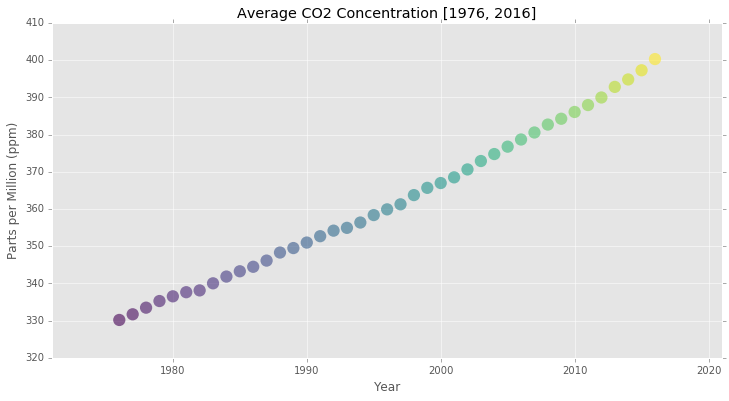

In [4]:
proj.plot_avg_carbon_concentration(co2_df, 1976, 2016)

## Linear Regression

In [33]:
import sklearn.linear_model as lm

# create linear regression model
lr = lm.LinearRegression()

years = np.arange(1976, 2017)
ppms = co2_df.groupby(['YYYY']).mean()['CO2(ppm)']
ppms = ppms[ppms.notnull()].values

# fit model to our training set
# numpy newaxis converts an array into a column vector
# conventionally, obcservations are rows and features are columns
lr.fit(years[:, np.newaxis], ppms)

# predict points
future_years = np.arange(1976, 2031)
ppms_lr = lr.predict(future_years[:, np.newaxis])

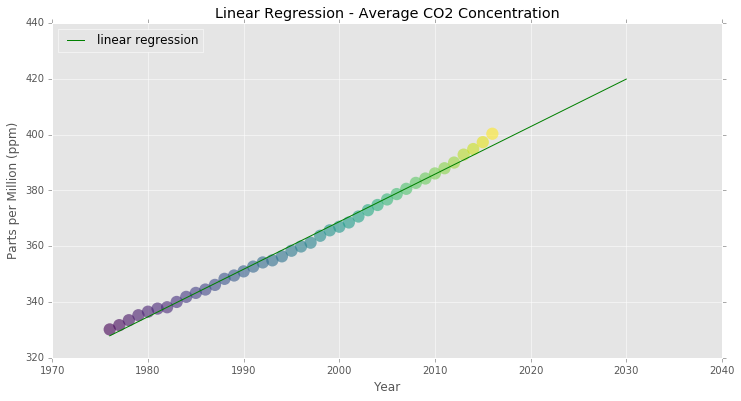

In [34]:
plt.figure(figsize=(12, 6))
plt.scatter(years, ppms, c=ppms, s = 150, alpha=0.6, edgecolors='none', cmap='viridis')
plt.plot(future_years, ppms_lr, c='green', label='linear regression')
plt.legend(loc=2)
plt.grid(True)
plt.title("Linear Regression - Average CO2 Concentration")
plt.xlabel("Year")
plt.ylabel("Parts per Million (ppm)")
plt.show()

### In this regression plot, we can see the concentration of carbon dioxide is increasing near linearly, and by the year 2030, the CO2 concentration is projected to be about 420 ppm.